# STA 561 Lab 8: Review of some classification algorithms

### Lab Material Author: Pritam Dey
#### Adapted from a previous STA 561 Lab created by Ed Tam 

Classification is one of the fundamental problems in statistics/machine learning. Classification methods are supervised learning techniques which use training data to learn a "classifier" that is used to identify the category of new observations. 

More precisely, training data for classification consists of observation units with features/covariates $X_i \in \Omega$ and corresponding class indicators/labels $y_i \in \mathcal{C}$ which indicate which classes these observations belong to. The goal is to learn a function $c: \Omega \rightarrow \mathcal{C} $ which takes the feature values of a new observation unit $X_{test}$ and returns a prediction for the class $\widehat{y}_{test}$ in which the new observation belongs to.

In addition to the two popular classification algorithms introduced in lab 4 (k-Nearest Neighbours and Random Forests) this lab aims to review two more popular classification algorithms, namely:

- Logistic Regression
- Support Vector Machine

## Logistic Regression

In its simplest form, logistic regression is a **probability based binary classification** model, i.e. it attempts to model the probability that an observation lies in one of two classes as a function of the given features.

Mathematically if $X_i = (X_{i,1}, X_{i,2}, X_{i,3}, \dots, X_{i,p})^T$ are the features of an observation belonging to one of two classes indicated by 1 and 0, then the logistic regression model posits: 

$$P(y_i = 1 \mid X_i) = \sigma(\alpha + X_i^T\beta) =  \frac{e^{\alpha + X_i^T\beta}}{1 + e^{\alpha + X_i^T\beta}}$$

An alternate interpretation of logistic regression is through log-odds. Recall that odds of an event $A$ refers to the ratio of its probability and the probability of its complementary event, i.e. $Odds(A) = \frac{P(A)}{P(A^{c})} = \frac{P(A)}{1 - P(A)}$. According to the logistic regression model,

$$log\textit{ }Odds(y_{i} = 1 \mid X_i) = log\left(\frac{P(y_i = 1 \mid X_i)}{P(y_i = 0 \mid X_i)}\right) = \alpha + X_i^T\beta$$

So, logistic regression is a linear model for the log-odds. It belongs to a class of models known as generalized linear models which as their name suggests are generalizations of linear models which express the distribution of the response variable as a function of some linear combination of features.

Let us now get a little taste of logistic regression with the breast cancer dataset from sklearn. The task is to predict whether a breast tumor is benign (0) or malignant(1) based on features such as the radius and area of the tumor etc. 

For a full description of the dataset and the features visit: https://scikit-learn.org/stable/datasets/toy_dataset.html

In [1]:
# Loading and inspecting the data
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [2]:
# Splitting the data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Fit the logistic regression model on the training set

from sklearn.linear_model import LogisticRegression
mod0 = LogisticRegression(solver='liblinear').fit(X_train,y_train)

Let us see how well our model performs in terms of classification for the test set. First we will predict the class labels and then we will calculate the accuracy of the classifier and the confusion matrix to find the performance of the classifier on each class.

In [3]:
# Prediction for the test set
y_test_pred = mod0.predict(X_test)

# Accuracy
mod0_accuracy = mod0.score(X_test, y_test)
print("Accuracy:", mod0_accuracy)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
mod0_confusion = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix: \n", mod0_confusion)

Accuracy: 0.9736842105263158
Confusion Matrix: 
 [[41  2]
 [ 1 70]]


Finally, let us look at the predicted probabilities of the class labels for each of the observations in the test set.

In [4]:
# Class Probabilities

mod0_pred_proba = mod0.predict_proba(X_test)
print("Class Probabilities: \n", mod0_pred_proba)

Class Probabilities: 
 [[9.99408578e-01 5.91421889e-04]
 [5.64821194e-01 4.35178806e-01]
 [7.73494102e-02 9.22650590e-01]
 [9.99999654e-01 3.45561098e-07]
 [1.00000000e+00 3.15518301e-12]
 [9.99970279e-01 2.97209135e-05]
 [2.23279848e-02 9.77672015e-01]
 [1.47211317e-01 8.52788683e-01]
 [7.46078666e-03 9.92539213e-01]
 [7.34837228e-03 9.92651628e-01]
 [9.99998137e-01 1.86293504e-06]
 [6.79072440e-03 9.93209276e-01]
 [4.62256886e-03 9.95377431e-01]
 [8.40095837e-02 9.15990416e-01]
 [9.99955804e-01 4.41955655e-05]
 [5.52015887e-02 9.44798411e-01]
 [8.91214595e-01 1.08785405e-01]
 [1.65127488e-02 9.83487251e-01]
 [3.97251043e-04 9.99602749e-01]
 [9.99980653e-01 1.93469869e-05]
 [1.98172598e-02 9.80182740e-01]
 [1.25046365e-01 8.74953635e-01]
 [6.07957550e-03 9.93920425e-01]
 [9.99999999e-01 5.48125316e-10]
 [3.65963897e-03 9.96340361e-01]
 [1.17111199e-02 9.88288880e-01]
 [9.99217531e-01 7.82469299e-04]
 [9.99999998e-01 2.11628994e-09]
 [9.99739649e-01 2.60350755e-04]
 [2.54584273e-03 9.9

##### A point to note

- Logistic Regression does not converge if the classes are perfectly separable by hyperplanes.
- Implicitly, scikit-learn adds a L2 (Ridge) penalty: just as mentioned in the class 

### Extension to more than two classes

Logistic Regression can be extended to more than one class via a simple generalization of the above formula. If there are $m$ classes namely $\{1,2,\dots,m\}$, then 

$$P(y_i = j \mid X_i) = \frac{e^{\alpha_{j} + X_i^T\beta_{j}}}{\sum_{k=1}^{m} e^{\alpha_{k} + X_i^T\beta_{k}}} $$

For a nice exposition/derivation, see Elements of Statistical Learning Ch. 4. Also look up on the softmax function.

However, in sklearn the code for fitting this multi-class logistic regresiion is exactly the same as the one for two classes. Let us test this out on the iris dataset.

In [5]:
# load and inspect the dataset 
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

print(y)
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

In [6]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

# Fit the logistic regression model on the training set
mod0 = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [7]:
# Prediction for the test set
y_test_pred = mod0.predict(X_test)

# Accuracy
mod0_accuracy = mod0.score(X_test, y_test)
print("Accuracy:", mod0_accuracy)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
mod0_confusion = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix: \n", mod0_confusion)

# Class Probabilities
mod0_pred_proba = mod0.predict_proba(X_test)
print("Class Probabilities: \n", mod0_pred_proba) 

Accuracy: 0.9666666666666667
Confusion Matrix: 
 [[12  0  0]
 [ 0 10  1]
 [ 0  0  7]]
Class Probabilities: 
 [[4.52073737e-04 2.95877854e-01 7.03670072e-01]
 [4.21874627e-02 8.03825265e-01 1.53987273e-01]
 [4.18018996e-02 6.55920182e-01 3.02277919e-01]
 [1.95672570e-04 4.19670017e-01 5.80134310e-01]
 [1.00214602e-02 7.50315149e-01 2.39663391e-01]
 [9.08421958e-04 2.94296700e-01 7.04794878e-01]
 [1.29728249e-02 3.33221730e-01 6.53805445e-01]
 [3.99880372e-02 6.24291128e-01 3.35720834e-01]
 [8.94018583e-01 1.05947321e-01 3.40965981e-05]
 [2.30394467e-02 8.58766955e-01 1.18193598e-01]
 [8.06993178e-01 1.92873537e-01 1.33285494e-04]
 [2.22819232e-02 7.05857657e-01 2.71860420e-01]
 [6.83173029e-01 3.16476931e-01 3.50039952e-04]
 [1.33754518e-03 3.10319519e-01 6.88342936e-01]
 [8.85755469e-01 1.14202964e-01 4.15665970e-05]
 [7.31138368e-04 2.30922428e-01 7.68346434e-01]
 [9.32708129e-01 6.72786309e-02 1.32399215e-05]
 [1.18785331e-01 7.25260538e-01 1.55954131e-01]
 [8.40128893e-01 1.59836946

## Support Vector Machines

Logistic Regression is a probabilistic classifier, i.e. it models the probabilities of an observation to lie in each class.  Another popular classification method which do not explicitly model probabilities of class labels is the support vector machine (SVM), which belong to a class of methods called large margin classifiers. 

The basic idea of SVM is illustrated in the picture. We have several data points $X_i$ in some feature space. We also know a **binary** class label for each data point. Here let the labels be $\{+1, -1\}$. The goal is to identify a hyperplane that separates the classes. As the picture illustrates, many hyperplanes can work reasonably well in terms of separation. How do we define the "best" one?   

<div>
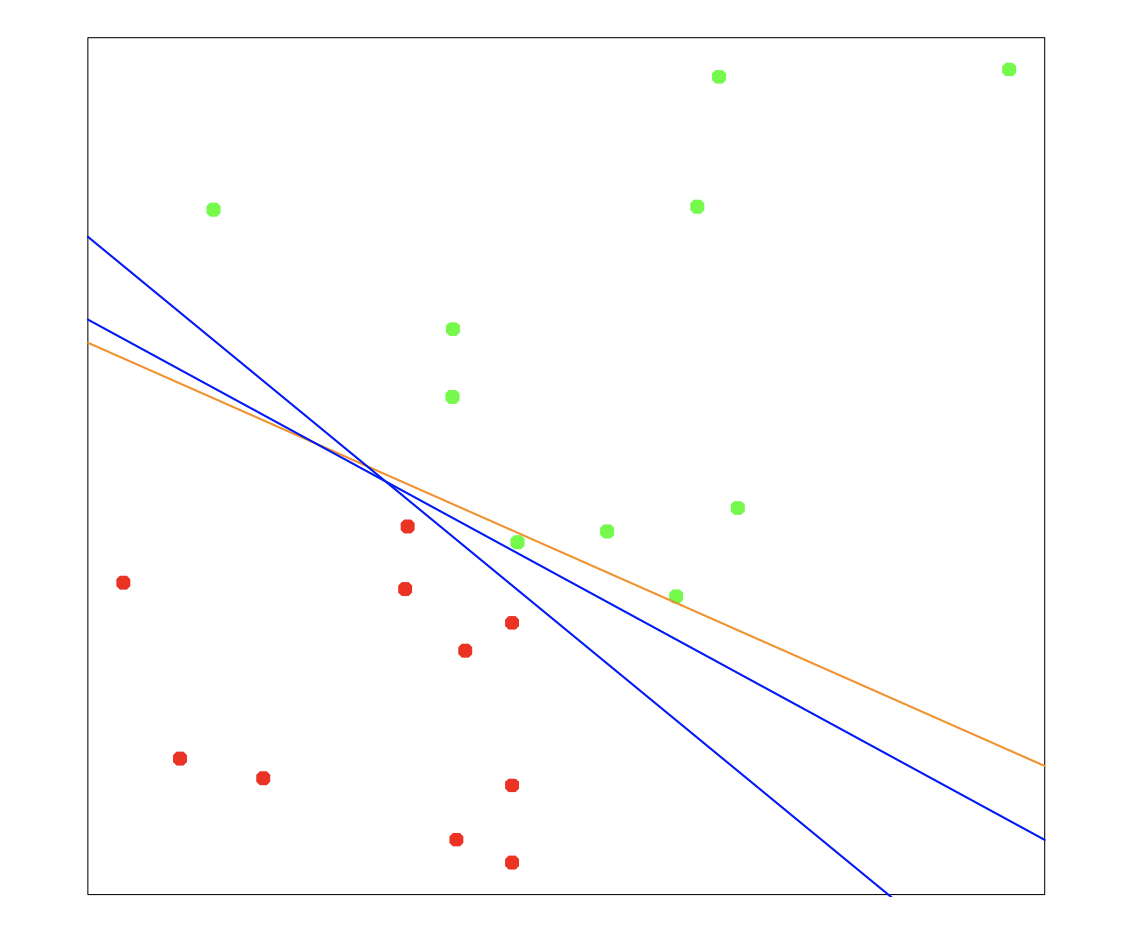
</div>

The idea of the SVM is to pick a hyperplane that is as far away from the closest data point as possible. This distance to the closest data point is called the margin. Intuitively, if the boundary is too close to any training datapoint, then the classifier might not generalize well, since some extra noise/perturbation might change classification results significantly. 

<div>
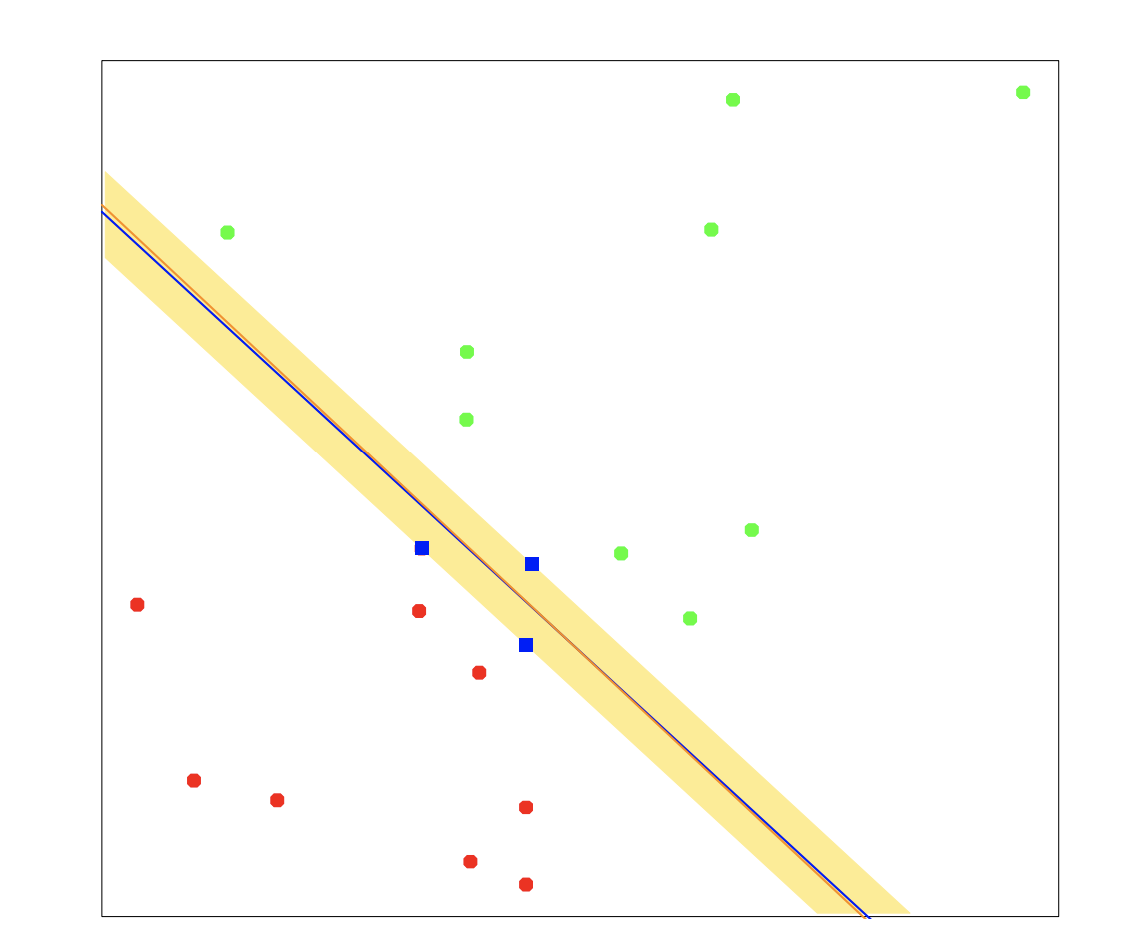
</div>

But how about when the data cannot be separated by a hyperplane? A generalization of this idea is the soft margin, where we allow misclassifications but penalize the misclassified points according to their distance from the classification boundary. We also penalize points close to the classification boundary. This is done by minimizing the $L_{2}$ penalized sum over all observations of a loss function called the hinge loss.

$$\widehat{w}, \widehat{b} = arg min  \frac{1}{n} \sum_{i=1}^{n} max\left(0, 1-y_i(w^TX_i - b)\right) + \lambda \mid\mid w \mid\mid_2$$

For a great reference and more details on derivations/math, see https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote09.html

As usual, the implementation in scikit-learn is quite straigtforward. Let us test it out on the breast cancer dataset. 

In [8]:
# Load data
X, y = load_breast_cancer(return_X_y=True)

# Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2023)

# Fit the support vector classifer on the training set

from sklearn.svm import SVC
mod1 = SVC()
mod1.fit(X_train, y_train)

# Prediction for the test set
y_test_pred = mod1.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
mod1_accuracy = accuracy_score(y_test_pred, y_test)
print("Accuracy:", mod1_accuracy)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
mod1_confusion = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix: \n", mod1_confusion)

Accuracy: 0.9122807017543859
Confusion Matrix: 
 [[34  9]
 [ 1 70]]


### Moving to multi-class SVMs

Like logistic regression, SVMs can also be generalized to do classification with more than two classes. Consider the following [example](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py) modified from the sklearn official website. Here the task is to identify handwritten digits from their pixellated images.

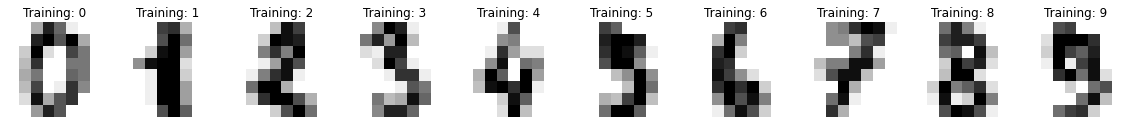

In [9]:
import matplotlib.pyplot as plt

# Loading the data
from sklearn.datasets import load_digits
digits = load_digits()

# Visualizing digits
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [10]:
data = digits.images.reshape((len(digits.images), -1))
mod3 = SVC(gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state = 2023)

# Learn the digits on the train subset
mod3.fit(X_train, y_train)

#Prediction on test digits
y_test_pred = mod3.predict(X_test)

# Confusion Matrix
mod3_confusion = confusion_matrix(y_test, y_test_pred)
print(f"Confusion matrix:\n{mod3_confusion}")

Confusion matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0 40  1  0  0  0]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  0  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  1  0  0  0 34]]
